# Customer Lifetime Value Prediction

Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies in 2019, and insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall.

## Business Problem
An Auto Insurance company in the USA is facing issues in retaining its customers and wants to advertise promotional offers for its loyal customers. They are considering Customer Lifetime Value CLV as a parameter for this purpose. Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies, and the insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall. Using CLV effectively can improve customer acquisition and customer retention, prevent churn, help the company to plan its marketing budget, measure the performance of their ads in more detail, and much more.

## Project Overview
- The objective of the problem is to accurately predict the Customer Lifetime Value(CLV) of the customer for an Auto Insurance Company
- Performed EDA to understand the relation of target variable CLV with the other features.
- Statistical Analysis techniques like OLS for numerical and Mann–Whitney U and also Kruskal Wallis test for the categorical variables were performed to find the significance of the features with respect to the target.
- Supervised Regression Models like Linear Regression, Ridge Regression, Lasso Regression, DecisionTree Regression, Random Forest Regression and Adaboost Regression.
- Using GridSearchCV with Random Forest Regression gave the best RMSE and R^2 score values

## Dataset Description
The dataset represents Customer lifetime value of an Auto Insurance Company in the United States, it includes over 24 features and 9134 records to analyze the lifetime value of Customer.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df=pd.read_csv("C:\\Users\\AK\\Desktop\\file\\AutoInsurance.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
df.shape

(9134, 24)

In [4]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
numerical_cols = df.select_dtypes(include=["int64","float64"])

In [9]:
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [10]:
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)

In [11]:
numerical_cols.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


In [12]:
df.isnull().sum()

Customer                         0
State                            0
CLV                              0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

There are no null values in the data .'CLV' is the dependent variable and 'Customer', 'State', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size are independent vaiables.

## EDA

## CLV target variable analysis

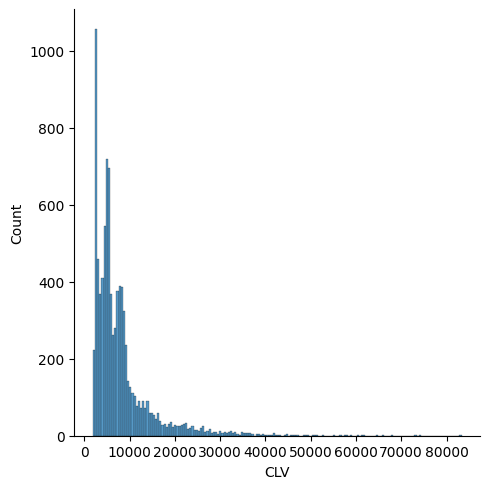

In [13]:
sns.displot(df["CLV"])
plt.show()

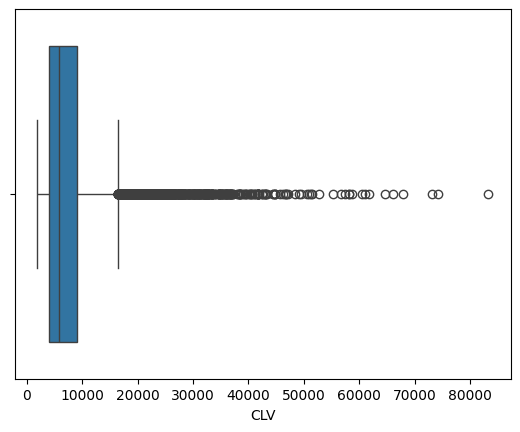

In [14]:
sns.boxplot(x=df["CLV"])
plt.show()

In [15]:
df["CLV"].skew()

3.0322802599299847

From the above both the graph it is clear that CLV is highly right skewed. There are lot of outliers in our dependent variable but we cant treat them directly because they are influential points.

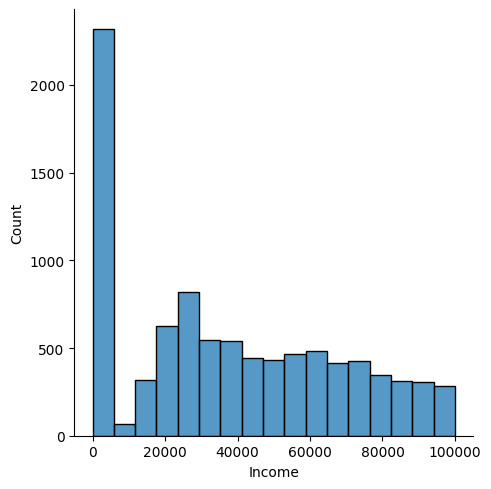

In [16]:
sns.displot(df["Income"])
plt.show()

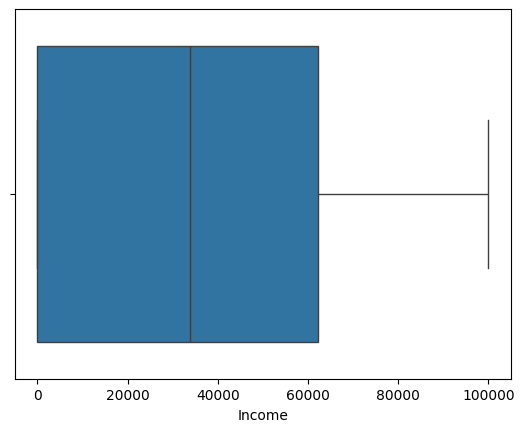

In [16]:
sns.boxplot(x=df["Income"])
plt.show()

## Bivariate analysis

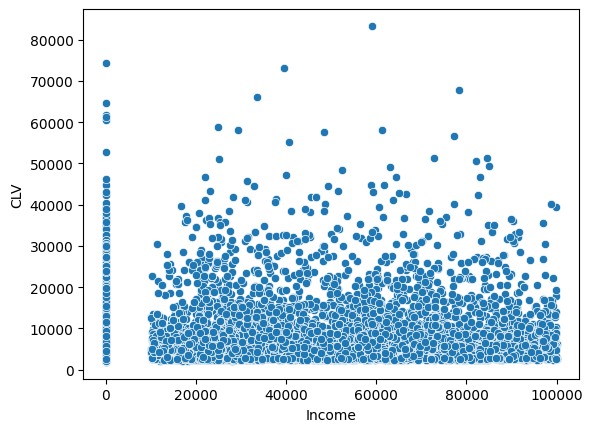

In [17]:
sns.scatterplot(x=df["Income"], y=df["CLV"])
plt.show()

There is no linear relationship between income and CLV.

## Monthly premium auto

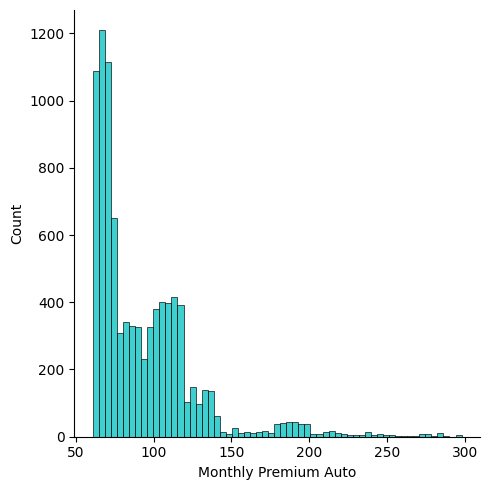

In [19]:
sns.displot(x=df["Monthly Premium Auto"],color='c')
plt.show()

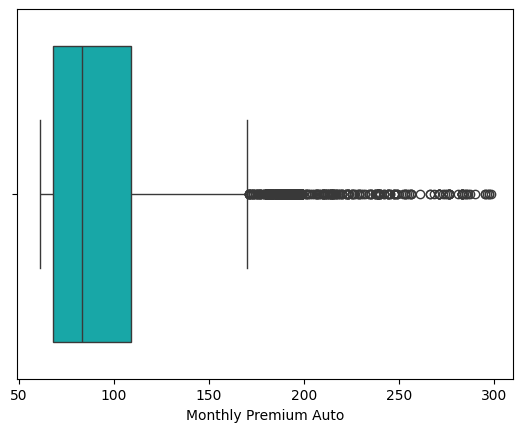

In [20]:
sns.boxplot(x=df["Monthly Premium Auto"],color='c')
plt.show()

## Bivariate Analysis

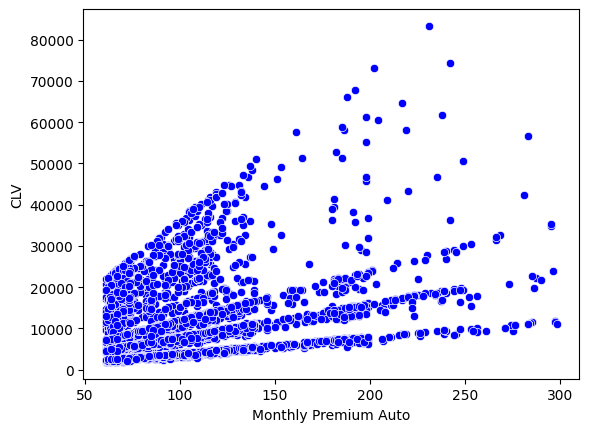

In [22]:
sns.scatterplot(x=df["Monthly Premium Auto"],y=df["CLV"],color='b')
plt.show()

There is linear relationship between income and CLV.

## Months Since Last Claim

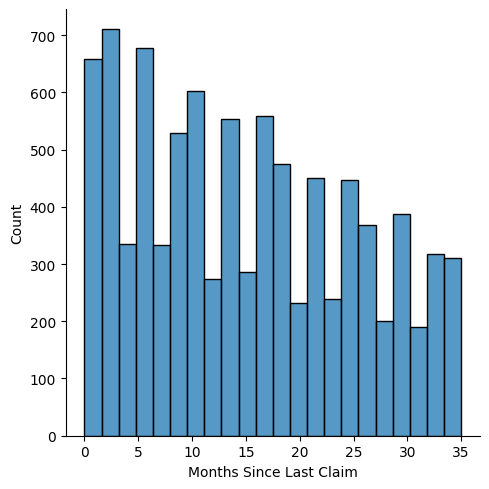

In [23]:
sns.displot(x=df['Months Since Last Claim'])
plt.show()

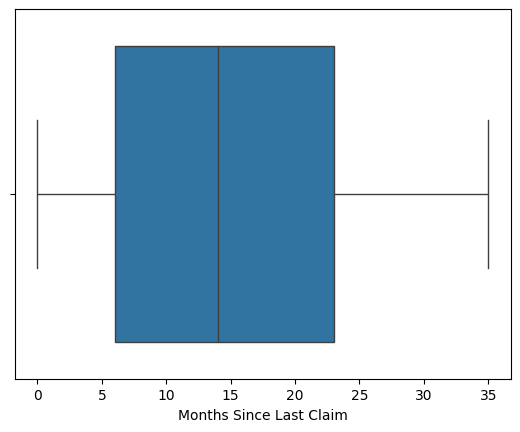

In [24]:
sns.boxplot(x=df["Months Since Last Claim"])
plt.show()

### Bivariate Analysis

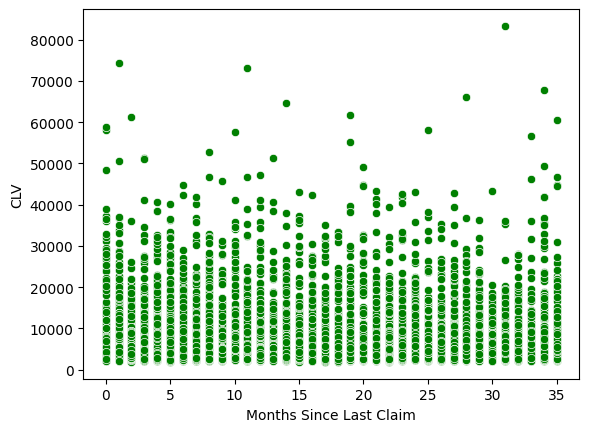

In [25]:
sns.scatterplot(x=df["Months Since Last Claim"],y=df["CLV"],color='g')
plt.show()

There is no linear relationship between CLV and months since last claim.

## Months Since Policy Inception

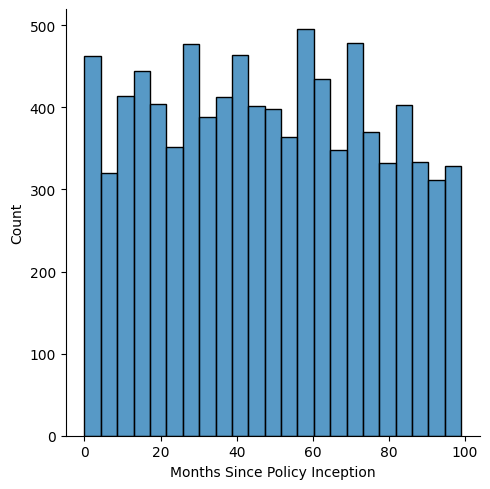

In [26]:
sns.displot(x=df['Months Since Policy Inception'])
plt.show()

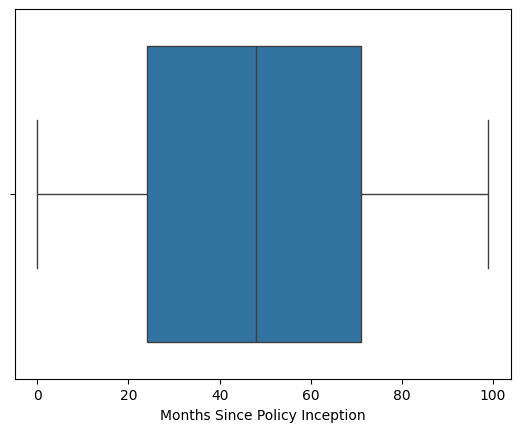

In [27]:
sns.boxplot(x=df["Months Since Policy Inception"])
plt.show()

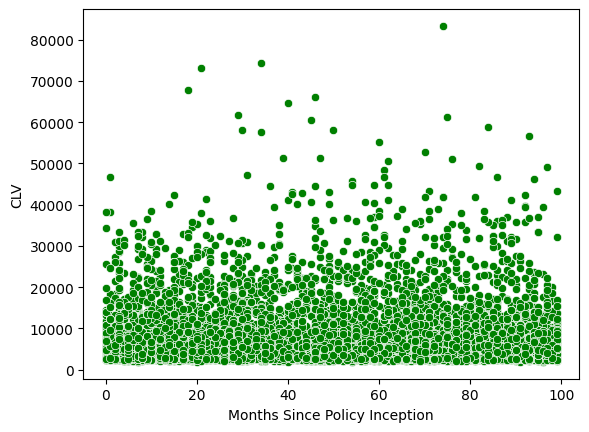

In [28]:
sns.scatterplot(x=df["Months Since Policy Inception"],y=df["CLV"],color='g')
plt.show()

In [ ]:
There is no linear relationship between CLV and months policy inception.

## Total claim amount

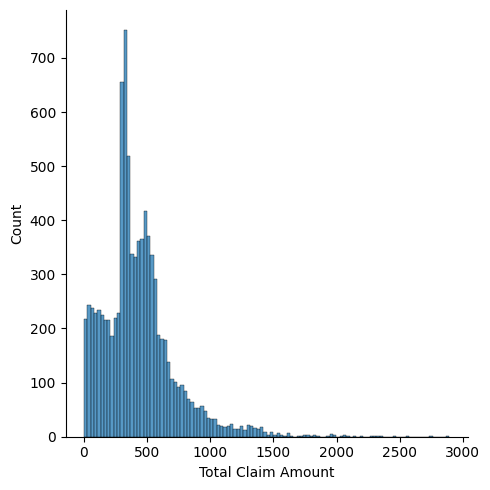

In [29]:
sns.displot(x=df['Total Claim Amount'])
plt.show()

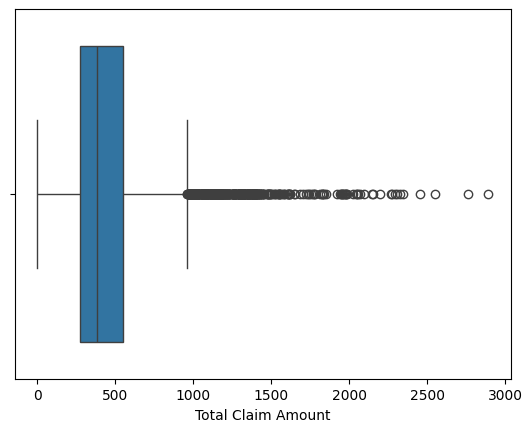

In [30]:
sns.boxplot(x=df["Total Claim Amount"])
plt.show()

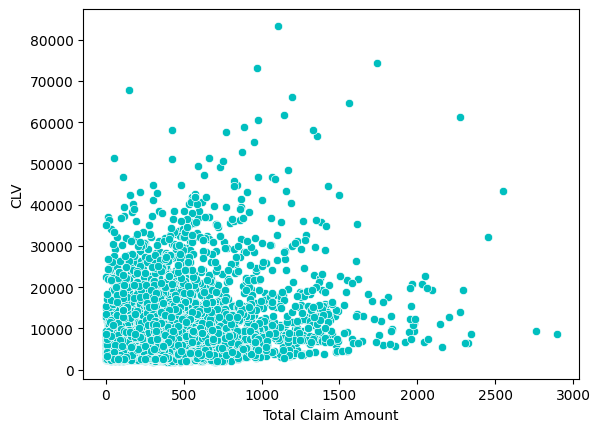

In [31]:
sns.scatterplot(x=df["Total Claim Amount"],y=df["CLV"],color='c')
plt.show()

There is a linear relationship between CLV and Total Claim Amount

The monthly premium auto and income feature has multiple peak's so to remove those peaks we can apply any of the power transformation (SQUARE / CUBE)

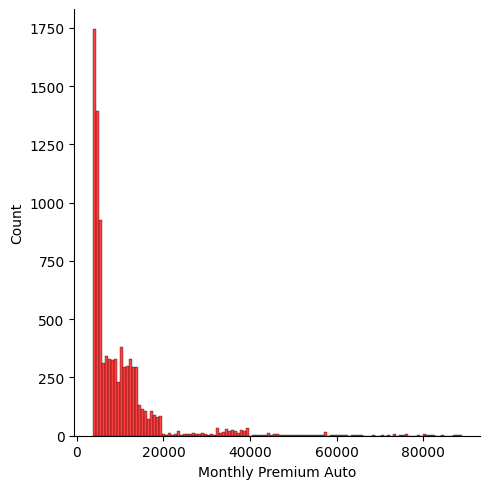

In [34]:
# Square the values of "Monthly Premium Auto"
squared_values = np.square(df["Monthly Premium Auto"])

# Create a distribution plot of the squared values
sns.displot(squared_values, color='r')
plt.show()

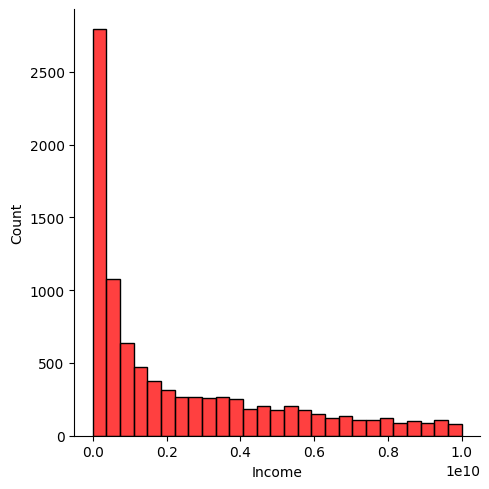

In [33]:

# Square the values of "Income"
squared_values = np.square(df["Income"])

# Create a distribution plot of the squared values
sns.displot(squared_values, color='r')
plt.show()

we can see that after the square transformation the data is getting heavily skewed, so we stick with the actual distribution again. We will just stick with the actual distribution of the feature in our model building.

## Categorical Variables

In [35]:
cat_cols = df.select_dtypes(include="object")

In [36]:
no_col = df[["Number of Open Complaints","Number of Policies"]]

In [37]:
cat_cols = pd.concat([cat_cols,no_col],axis=1)

In [38]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [39]:
cat_cols.drop("Effective To Date",axis=1,inplace=True)

In [40]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [41]:
for i in cat_cols:
    print("Unique values in",str(i),"is",df[i].nunique())
    print(df[i].value_counts())
    print("-----------------------------------------")

Unique values in Customer is 9134
Customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: count, Length: 9134, dtype: int64
-----------------------------------------
Unique values in State is 5
State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
-----------------------------------------
Unique values in Response is 2
Response
No     7826
Yes    1308
Name: count, dtype: int64
-----------------------------------------
Unique values in Coverage is 3
Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
-----------------------------------------
Unique values in Education is 5
Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
-------------------------------

Customer column which is the id has unique values for all records so it can be removed for model building as it adds no significance.

## State

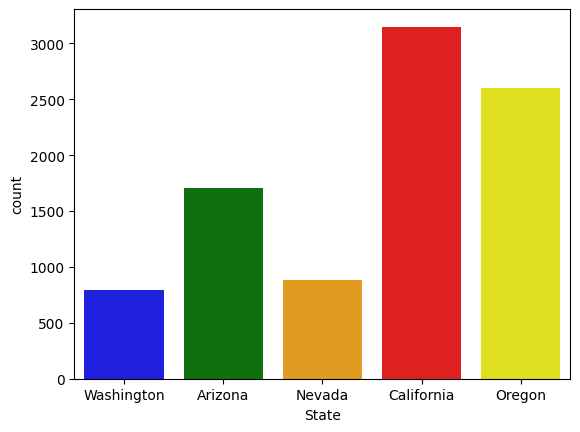

In [42]:
# Define a custom color palette with colors for each state
custom_palette = {
    "Washington": "blue",
    "Arizona": "green",
    "Nevada": "orange",
    "California": "red",
    "Oregon": "yellow",
   
}
# Create the count plot with the custom palette
sns.countplot(x="State", hue="State", data=df, palette=custom_palette.values(), legend=False)
plt.show()

Large number of people are residing in california.

## Response

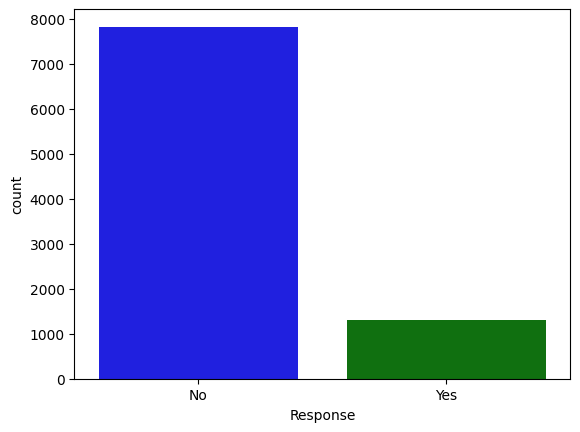

In [44]:
# Define a custom color palette with colors for each response
custom_palette = {
    "Yes": "blue",
    "No": "green"
    # Add more colors for additional response categories if needed
}
# Create the count plot with the custom palette
sns.countplot(x="Response", hue="Response", data=df, palette=custom_palette.values(), legend=False)
plt.show()

Its seems that less than 1400 customers have responded to the marketing calls

## Coverage

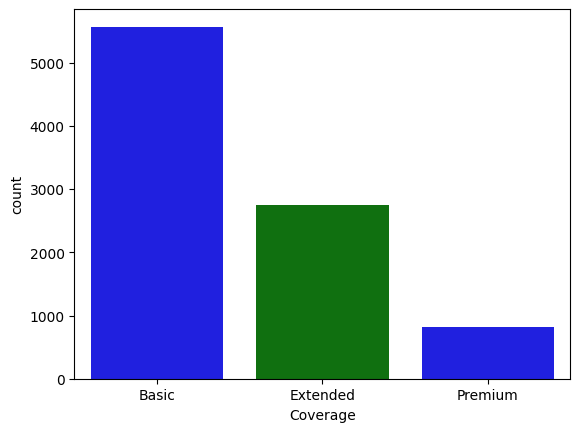

In [45]:
# Create the count plot with the custom palette
sns.countplot(x="Coverage", hue="Coverage", data=df, palette=custom_palette.values(), legend=False)
plt.show()

## Education

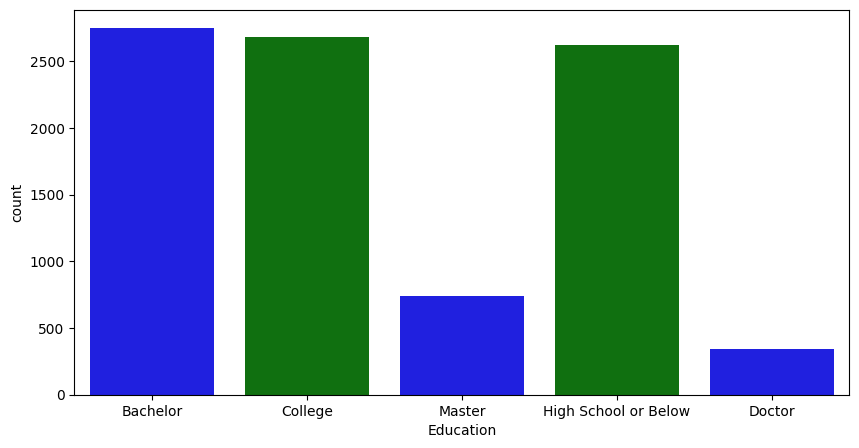

In [46]:
# Create the count plot with the custom palette
plt.figure(figsize=(10,5))
sns.countplot(x="Education", hue="Education", data=df, palette=custom_palette.values(), legend=False)
plt.show()

Most of the customers have either a bachelor or college degree.

## Employment Status

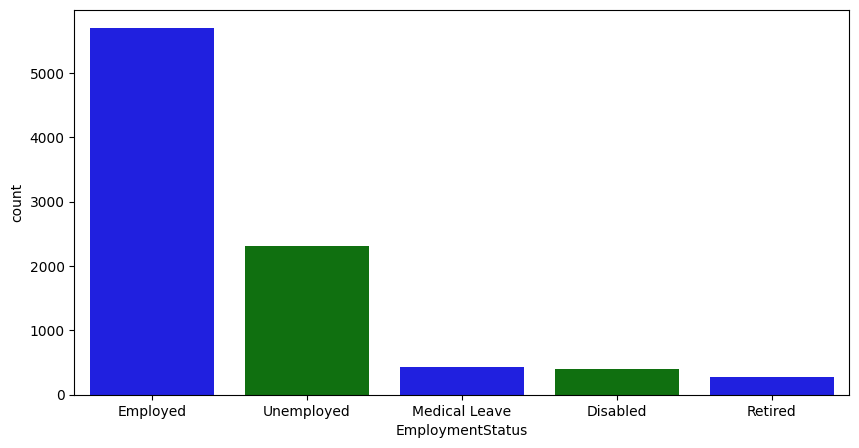

In [47]:
# Create the count plot with the custom palette
plt.figure(figsize=(10,5))
sns.countplot(x="EmploymentStatus", hue="EmploymentStatus", data=df, palette=custom_palette.values(), legend=False)
plt.show()

In [50]:
df["EmploymentStatus"].value_counts(normalize=True)*100

EmploymentStatus
Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: proportion, dtype: float64

Around 62.38% of the customers are employed.

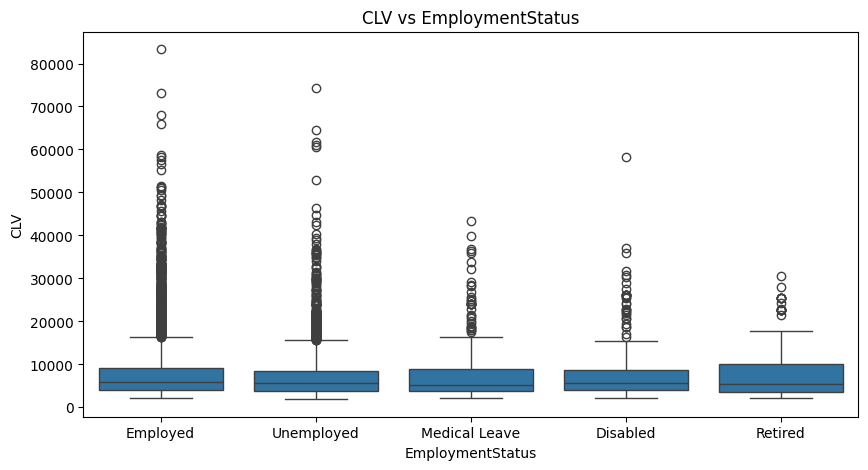

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['EmploymentStatus'],y=df['CLV'])
plt.title("CLV vs EmploymentStatus")
plt.show()

## Gender

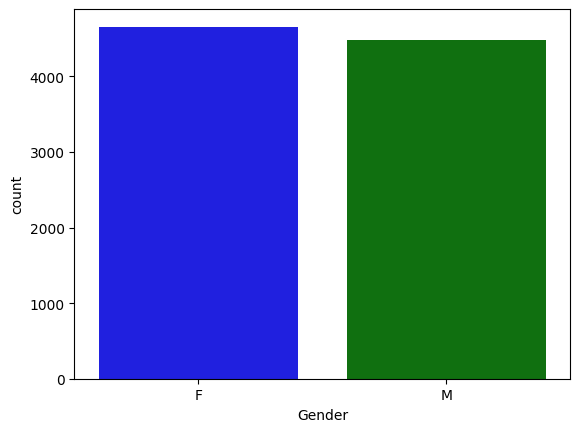

In [52]:
# Create the count plot with the custom palette
sns.countplot(x="Gender", hue="Gender", data=df, palette=custom_palette.values(), legend=False)
plt.show()

## Location Code

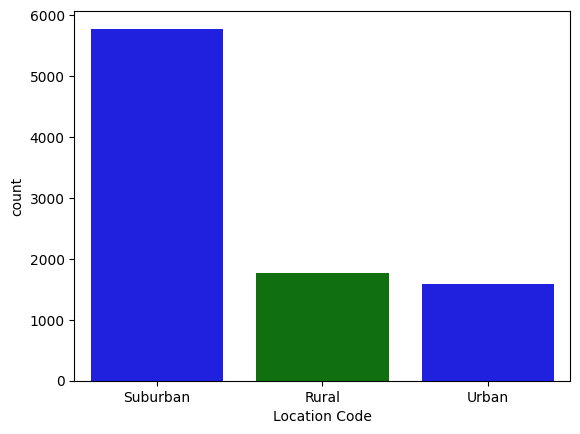

In [53]:
sns.countplot(x="Location Code", hue="Location Code", data=df, palette=custom_palette.values(), legend=False)
plt.show()

## Marital status

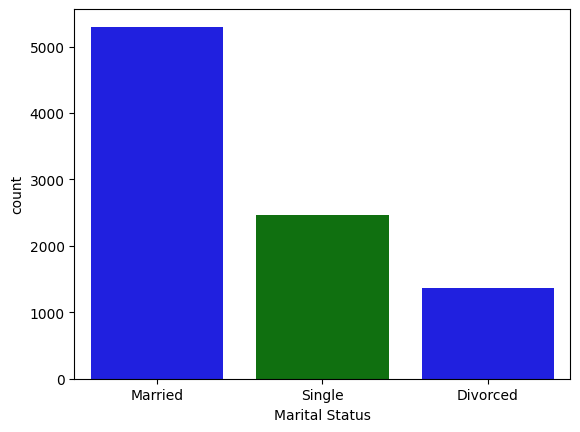

In [54]:

sns.countplot(x="Marital Status", hue="Marital Status", data=df, palette=custom_palette.values(), legend=False)
plt.show()

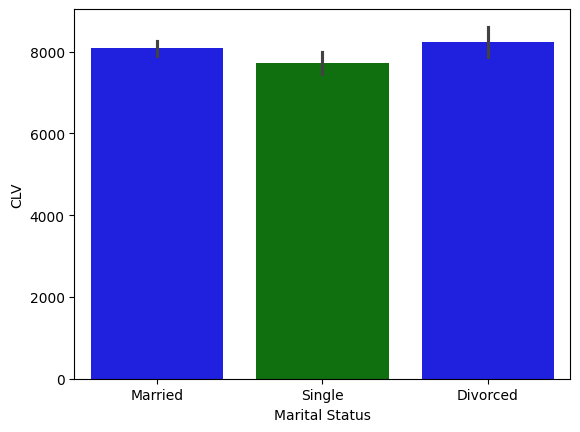

In [60]:
sns.barplot(x=df["Marital Status"],y=df["CLV"],hue="Marital Status", data=df, palette=custom_palette.values(), legend=False)
plt.show()

## Policy type

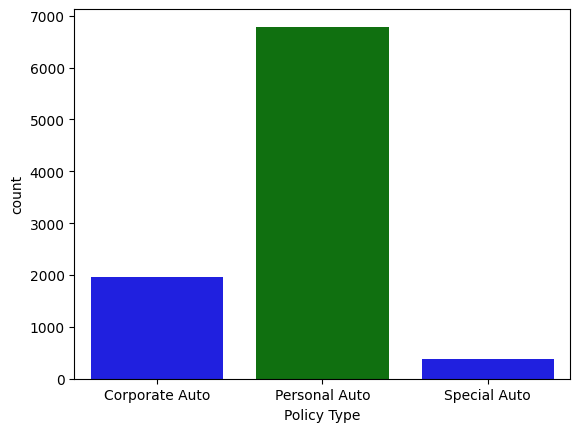

In [61]:

sns.countplot(x="Policy Type", hue="Policy Type", data=df, palette=custom_palette.values(), legend=False)
plt.show()

## Policy

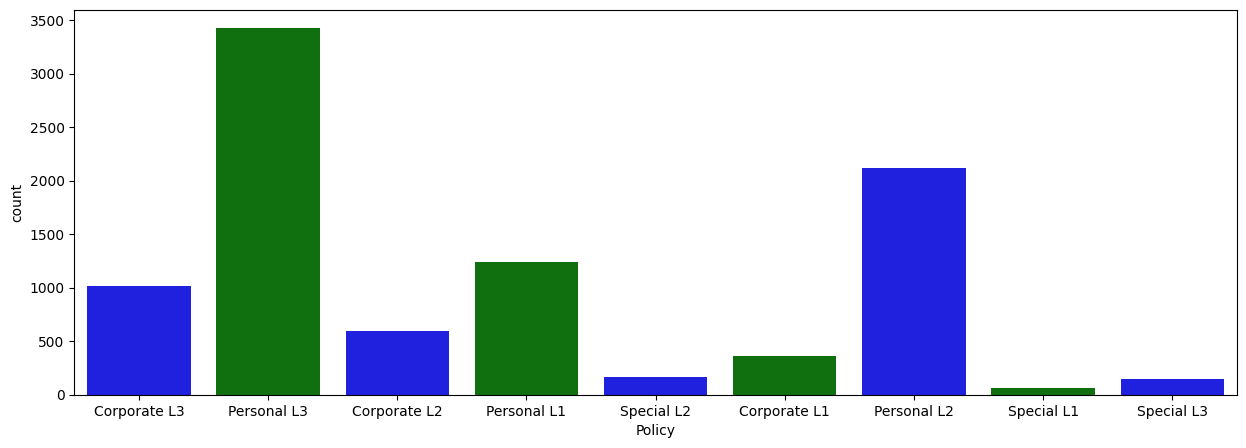

In [62]:
plt.figure(figsize=(15,5))
sns.countplot(x="Policy", hue="Policy", data=df, palette=custom_palette.values(), legend=False)
plt.show()

Personal L3 policy subcategory has the most number of customers

## Renew Offer type

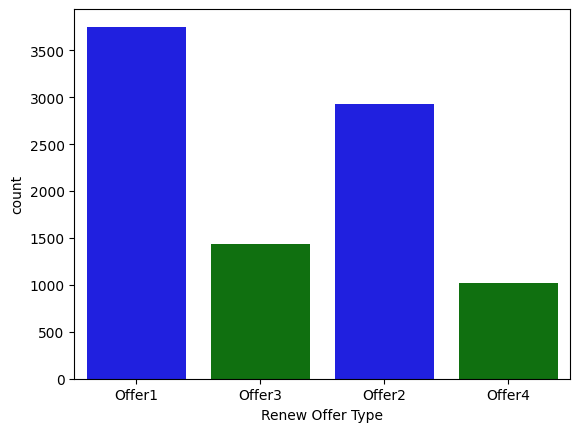

In [63]:
sns.countplot(x="Renew Offer Type", hue="Renew Offer Type", data=df, palette=custom_palette.values(), legend=False)
plt.show()

## Sales Channel

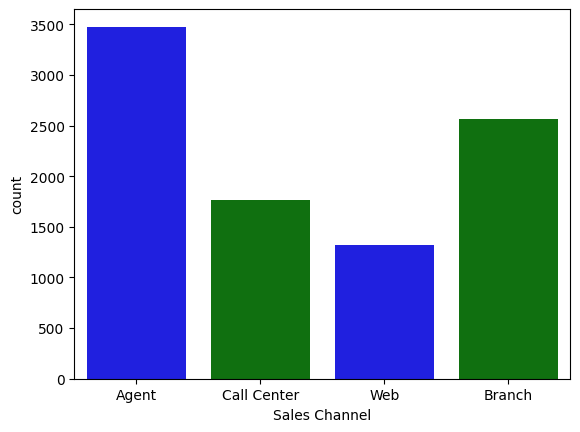

In [64]:

sns.countplot(x="Sales Channel", hue="Sales Channel", data=df, palette=custom_palette.values(), legend=False)
plt.show()

## Vehicle Class

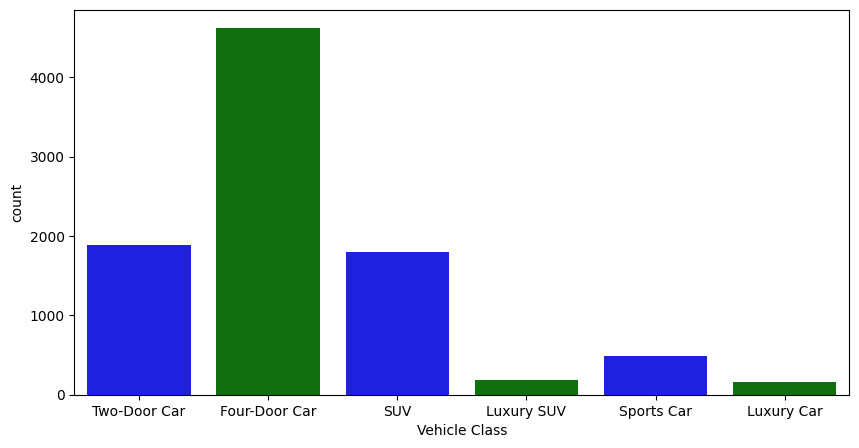

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(x="Vehicle Class", hue="Vehicle Class", data=df, palette=custom_palette.values(), legend=False)
plt.show()

## Vehicle Size

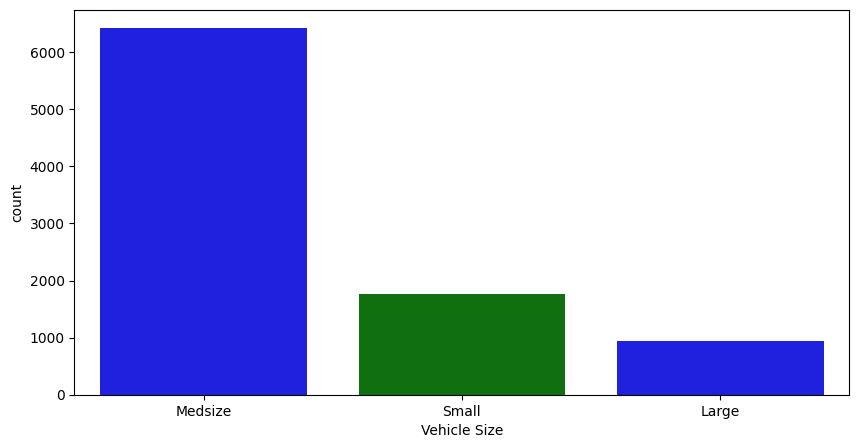

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x="Vehicle Size", hue="Vehicle Size", data=df, palette=custom_palette.values(), legend=False)
plt.show()

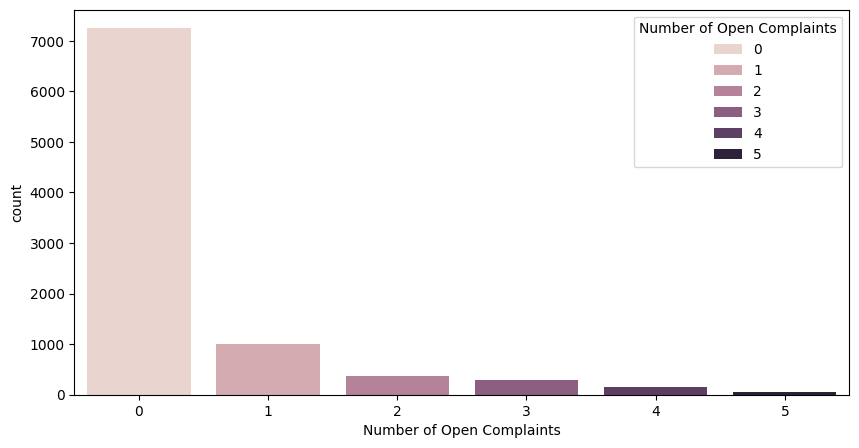

In [68]:
# Create the count plot without specifying the palette
plt.figure(figsize=(10, 5))
sns.countplot(x="Number of Open Complaints", hue="Number of Open Complaints", data=df)
plt.show()

## Number of Open Complaints

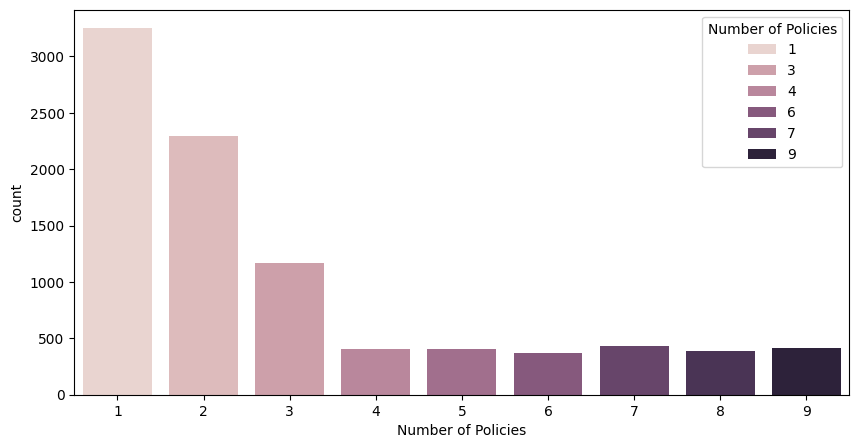

In [69]:
# Create the count plot without specifying the palette
plt.figure(figsize=(10, 5))
sns.countplot(x="Number of Policies", hue="Number of Policies", data=df)
plt.show()

In [71]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'], format='%Y-%m-%d')


In [72]:
df["Months"] = df["Effective To Date"].dt.month

In [73]:
df['Months'] = df['Months'].astype('object')

## Months

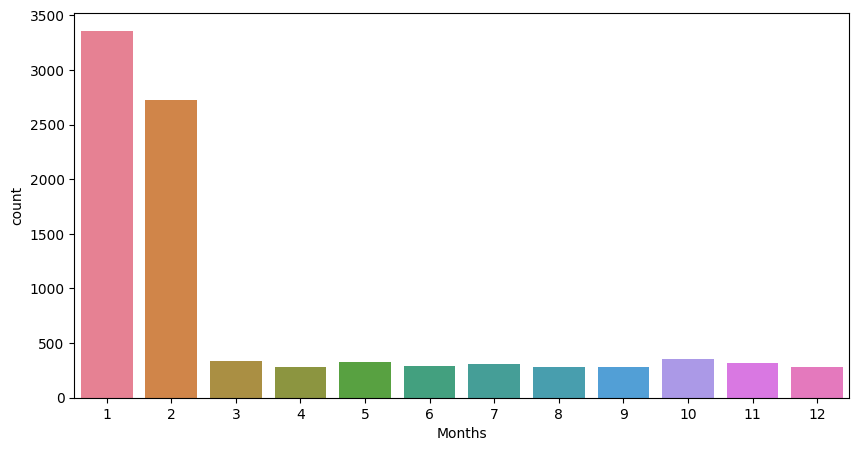

In [74]:
# Generate a palette with enough colors
palette = sns.color_palette("husl", 12)

# Plot the countplot with the generated palette
plt.figure(figsize=(10, 5))
sns.countplot(x="Months", hue="Months", data=df, palette=palette, legend=False)
plt.show()

In [75]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [76]:
df.columns

Index(['Customer', 'State', 'CLV', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months'],
      dtype='object')

## HeatMap

In [77]:
heatmap = df[['CLV', 'Income', 'Monthly Premium Auto','Total Claim Amount']]

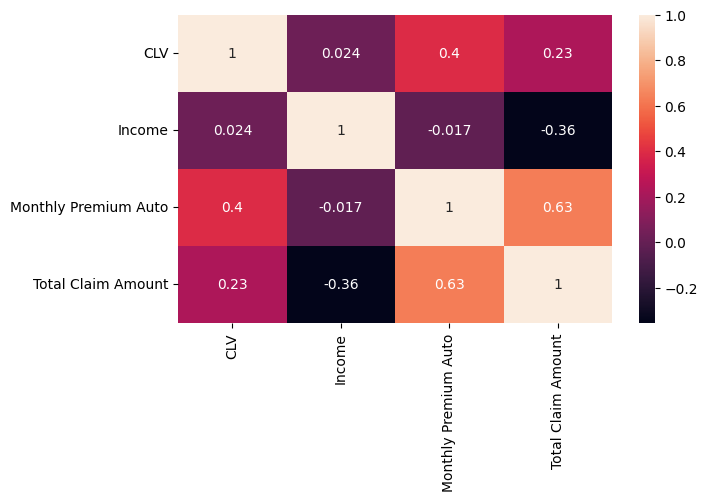

In [78]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
plt.show()

We can clearly see in the heatmap, that customer lifetime value has a better correlation with monthly premium auto and acceptable correlation with total claim amount.

## Statistical Significance

- H0:The null hypothesis of the test is the data is normally distributed
- HA:The data is not normally distributed

In [79]:
import scipy.stats as stats

# Perform Shapiro-Wilk test
shapiro_results = stats.shapiro(df['CLV'])

# Print the test results
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_results[0])
print("P-value:", shapiro_results[1])


Shapiro-Wilk Test:
Test Statistic: 0.7033725380897522
P-value: 0.0


D:\Users\AK\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p-value less than 0.05 we reject null hypothesis the data is not normally distributed.

We will proceed with non parametric tests since the dependent variable is not normally distributed.

In [80]:
columns_cat = list(cat_cols.columns)
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [81]:
manwhiteneyy = []
anova = []

for i in columns_cat:
    if (df[i].nunique()>2):
        anova.append(i)
    else:
        manwhiteneyy.append(i)
print("Anova:",anova)
print("TTest:",manwhiteneyy)

Anova: ['Customer', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies']
TTest: ['Response', 'Gender']


H0, the distributions of both populations are equal The alternative hypothesis H1 is that the distributions are not equal.

In [82]:
yes=df[df['Response']=='No']['CLV']
no=df[df['Response']=='Yes']['CLV']

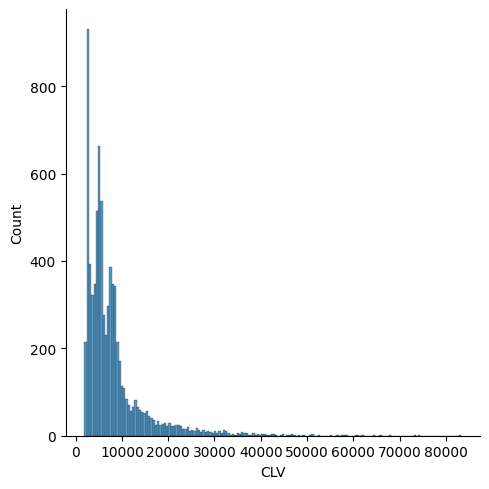

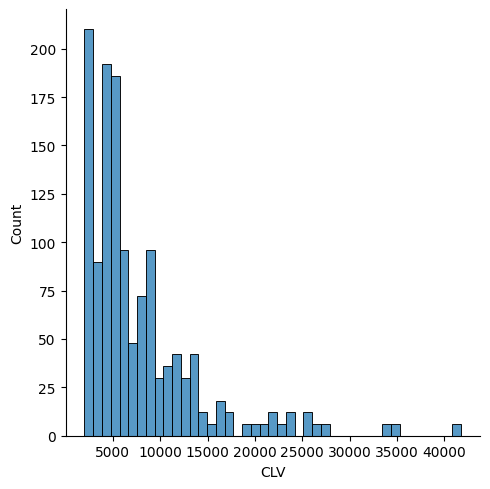

In [83]:
sns.displot(yes)
sns.displot(no)

If the distributions are identical, which is the null hypothesis of the Mann-Whitney U test, the mean rank will be the same

In [84]:
f = stats.mannwhitneyu(yes,no)
print(f)

MannwhitneyuResult(statistic=5175420.0, pvalue=0.5168872245291198)


p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.

In [85]:
male=df[df['Gender']=='M']['CLV']
female=df[df['Gender']=='F']['CLV']

In [87]:
b =stats.mannwhitneyu(male,female)
print(b)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)


p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.

we test above two features with non-Paramteric unpaired ttest and we concluded that those 2 features is not significant to predict traget

H0:the mean ranks of the groups are the same.

H1:the mean ranks of the groups are not the same.

In [88]:
ca=df[df['State']=='California']['CLV']
Or=df[df['State']=='Oregon']['CLV']
Ar=df[df['State']=='Arizona']['CLV']
Ne=df[df['State']=='Nevada']['CLV']
Wa=df[df['State']=='Washington']['CLV']

In [89]:
a = stats.kruskal(ca,Or,Ar,Ne,Wa)
print(a)

KruskalResult(statistic=5.072069583836472, pvalue=0.27998232358818953)


p-value > 0.05 failed to reject H0

In [90]:
stats.f_oneway(ca,Or,Ar,Ne,Wa)
print(b)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)


In [91]:
Ba=df[df['Coverage']=='Basic']['CLV']
Ex=df[df['Coverage']=='Extended']['CLV']
Pr=df[df['Coverage']=='Premium']['CLV']

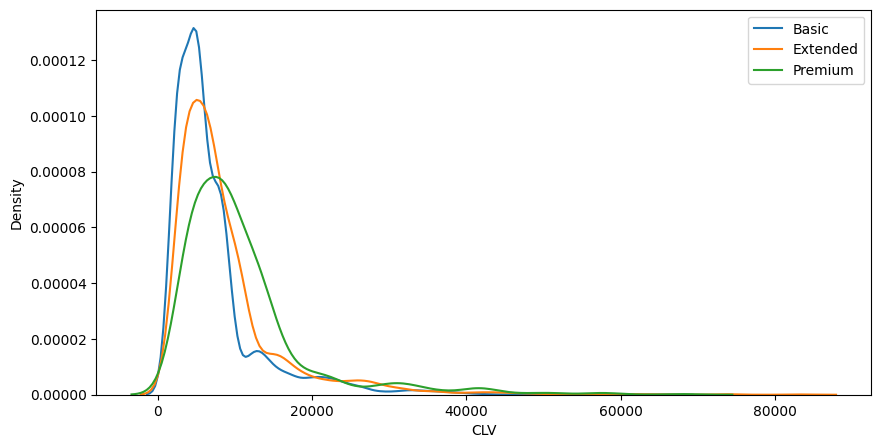

In [93]:
# Create a single graph with KDE plots for different subsets of data
plt.figure(figsize=(10, 5))

# Plot KDE plots for each subset of data
sns.kdeplot(data=Ba, label='Basic')
sns.kdeplot(data=Ex, label='Extended')
sns.kdeplot(data=Pr, label='Premium')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [94]:
c =stats.kruskal(Ba,Ex,Pr)
print(c)

KruskalResult(statistic=502.4996090762843, pvalue=7.648852917746348e-110)


p-value < 0.05 to reject H0

In [95]:
stats.f_oneway(Ba,Ex,Pr)

F_onewayResult(statistic=133.67511419504905, pvalue=6.0158970099807e-58)

In [96]:
Ba=df[df['Education']=='Bachelor']['CLV']
Co=df[df['Education']=='College']['CLV']
Hi=df[df['Education']=='High School or Below']['CLV']
Ma=df[df['Education']=='Master']['CLV']
Da=df[df['Education']=='Doctor']['CLV']

In [97]:
d= stats.kruskal(Ba,Co,Hi,Ma,Da)
print(d)

KruskalResult(statistic=12.234061758188824, pvalue=0.015693004298603028)


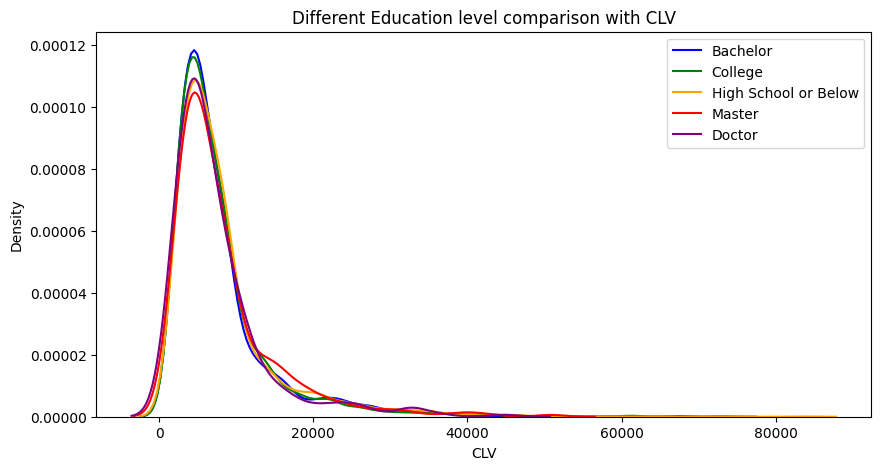

In [90]:

# Create a single graph with KDE plots for different subsets of data
plt.figure(figsize=(10, 5))

# Plot KDE plots for each subset of data
sns.kdeplot(data=Ba, label='Bachelor', color='blue')
sns.kdeplot(data=Co, label='College', color='green')
sns.kdeplot(data=Hi, label='High School or Below', color='orange')
sns.kdeplot(data=Ma, label='Master', color='red')
sns.kdeplot(data=Da, label='Doctor', color='purple')

# Add title and legend
plt.title("Different Education level comparison with CLV")
plt.legend()

# Show the plot
plt.show()


p-value < 0.05 reject H0, Education is significant in predicting CLV

In [98]:
Ba=df[df['EmploymentStatus']=='Employed']['CLV']
Co=df[df['EmploymentStatus']=='Unemployed']['CLV']
Hi=df[df['EmploymentStatus']=='Medical Leave']['CLV']
Ma=df[df['EmploymentStatus']=='Disabled']['CLV']
Da=df[df['EmploymentStatus']=='Retired']['CLV']

In [99]:
e = stats.kruskal(Ba,Co,Hi,Ma,Da)
print(e)

KruskalResult(statistic=42.56159302970864, pvalue=1.2758458797542519e-08)


p-value < 0.05 reject H0, EmploymentStatus is significant in predicting CLV

In [100]:
Ba=df[df['Location Code']=='Suburban']['CLV']
Co=df[df['Location Code']=='Rural']['CLV']
Hi=df[df['Location Code']=='Urban']['CLV']

In [101]:
g = stats.kruskal(Ba,Co,Hi)
print(g)

KruskalResult(statistic=2.4638212999332567, pvalue=0.29173464205664124)


p-value < 0.05 reject H0, Location Code can be significant in predicting CLV

In [102]:
Ba=df[df['Marital Status']=='Married']['CLV']
Co=df[df['Marital Status']=='Single']['CLV']
Hi=df[df['Marital Status']=='Divorced']['CLV']

In [103]:
h = stats.kruskal(Ba,Co,Hi)
print(h)

KruskalResult(statistic=20.895798766808223, pvalue=2.9009146434700455e-05)


p-value < 0.05 reject H0, Marital Status can be significant in predicting CLV

In [104]:
Ba=df[df['Number of Open Complaints']==0]['CLV']
Co=df[df['Number of Open Complaints']==1]['CLV']
Hi=df[df['Number of Open Complaints']==2]['CLV']
Ma=df[df['Number of Open Complaints']==3]['CLV']
Da=df[df['Number of Open Complaints']==4]['CLV']
As=df[df['Number of Open Complaints']==5]['CLV']

In [105]:
o = stats.kruskal(Ba,Co,Hi,Ma,Da,As)
print(o)

KruskalResult(statistic=29.160617988301833, pvalue=2.1564409504417123e-05)


p-value < 0.05 reject H0, Number of Open Complaints can be significant in predicting CLV

In [108]:
Ba=df[df['Number of Policies']==1]['CLV']
Co=df[df['Number of Policies']==2]['CLV']
Hi=df[df['Number of Policies']==3]['CLV']

In [109]:
p = stats.kruskal(Ba,Co,Hi)
print(p)

KruskalResult(statistic=5017.7060662040785, pvalue=0.0)


p-value < 0.05 reject H0, Number of Policies can be significant in predicting CLV

In [110]:
Ba=df[df['Policy Type']=='Personal Auto']['CLV']
Co=df[df['Policy Type']=='Corporate Auto']['CLV']
Hi=df[df['Policy Type']=='Special Auto']['CLV']

In [111]:
i = stats.kruskal(Ba,Co,Hi)
print(i)

KruskalResult(statistic=4.6074986354931795, pvalue=0.0998836452694168)


p-value > 0.05 failed to reject H0, Policy Type may not be significant in predicting CLV

In [112]:
Ba=df[df['Policy']=='Personal L3']['CLV']
Co=df[df['Policy']=='Personal L2']['CLV']
Hi=df[df['Policy']=='Personal L1']['CLV']
Ma=df[df['Policy']=='Corporate L3']['CLV']
Da=df[df['Policy']=='Corporate L2']['CLV']
Ca=df[df['Policy']=='Corporate L1']['CLV']
s1=df[df['Policy']=='Special L2']['CLV']
s2=df[df['Policy']=='Special L3']['CLV']
s3=df[df['Policy']=='Special L1']['CLV']

In [113]:
j =stats.kruskal(Ba,Co,Hi,Ma,Da,Ca,s1,s2,s3)
print(j)

KruskalResult(statistic=7.944351884462466, pvalue=0.4389248352544014)


p-value > 0.05 failed to reject H0, Policy may not be significant in predicting CLV

In [114]:
Ba=df[df['Renew Offer Type']=='Offer1']['CLV']
Co=df[df['Renew Offer Type']=='Offer2']['CLV']
Hi=df[df['Renew Offer Type']=='Offer3']['CLV']
Ma=df[df['Renew Offer Type']=='Offer4']['CLV']

In [115]:
k =stats.kruskal(Ba,Co,Hi,Ma)
print(k)

KruskalResult(statistic=168.90219457792458, pvalue=2.196144881912684e-36)


p-value < 0.05 reject H0, Number of Policies can be significant in predicting CLV

In [116]:
Ba=df[df['Sales Channel']=='Agent']['CLV']
Co=df[df['Sales Channel']=='Branch']['CLV']
Hi=df[df['Sales Channel']=='Call Center']['CLV']
Ma=df[df['Sales Channel']=='Web']['CLV']

In [117]:
l = stats.kruskal(Ba,Co,Hi,Ma)
print(l)

KruskalResult(statistic=4.491751501229693, pvalue=0.2130272157209903)


p-value > 0.05 failed to reject H0, Sales Channel may not be significant in predicting CLV

In [118]:
Ba=df[df['Vehicle Class']=='Four-Door Car']['CLV']
Co=df[df['Vehicle Class']=='Two-Door Car']['CLV']
Hi=df[df['Vehicle Class']=='SUV']['CLV']
Ma=df[df['Vehicle Class']=='Sports Car']['CLV']
Da=df[df['Vehicle Class']=='Luxury SUV']['CLV']
Ca=df[df['Vehicle Class']=='Luxury Car']['CLV']

In [119]:
m = stats.kruskal(Ba,Co,Hi,Ma,Da,Ca)
print(m)

KruskalResult(statistic=1310.5494960284416, pvalue=3.309676344717952e-281)


p-value < 0.05 reject H0, Vehicle Class can be significant in predicting CLV

In [120]:
Ba=df[df['Vehicle Size']=='Medsize']['CLV']
Co=df[df['Vehicle Size']=='Small']['CLV']
Hi=df[df['Vehicle Size']=='Large']['CLV']

In [121]:
n =stats.kruskal(Ba,Co,Hi)
print(n)

KruskalResult(statistic=9.564995661218877, pvalue=0.00837505335446059)


p-value < 0.05 reject H0, Vehicle Class can be significant in predicting CLV

In [122]:
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [123]:
cat_cols.drop("Customer",axis=1,inplace=True)

In [124]:
cat_cols

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,0,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,0,1
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,3,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,0,3


In [125]:
p_values = [a[1],b[1],c[1],d[1],e[1],f[1],g[1],h[1],i[1],j[1],k[1],l[1],m[1],n[1],o[1],p[1]]

In [126]:
p_values

[0.27998232358818953,
 0.48749303056449833,
 7.648852917746348e-110,
 0.015693004298603028,
 1.2758458797542519e-08,
 0.5168872245291198,
 0.29173464205664124,
 2.9009146434700455e-05,
 0.0998836452694168,
 0.4389248352544014,
 2.196144881912684e-36,
 0.2130272157209903,
 3.309676344717952e-281,
 0.00837505335446059,
 2.1564409504417123e-05,
 0.0]

In [127]:
len(p_values)

16

In [128]:
len(cat_cols.columns)

16

In [129]:
pd.DataFrame(p_values,index=(cat_cols.columns),columns=['P_Value'])

,P_Value
State,2.799823e-01
Response,4.874930e-01
Coverage,7.648853e-110
Education,1.569300e-02
EmploymentStatus,1.275846e-08
Gender,5.168872e-01
Location Code,2.917346e-01
Marital Status,2.900915e-05
Policy Type,9.988365e-02
Policy,4.389248e-01


Coverage,Education,EmploymentStatus,Marital Status, Renew Offer Type, Vehicle class, Vehicle class, Number of open complaints and No of Policies play a significant role in predicting the CLV

In [130]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [131]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [132]:
import statsmodels.api as sm

## Data Preprocessing

In [133]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [134]:
catg=pd.get_dummies(cat_cols,drop_first=True)

In [135]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [136]:
dfn = pd.concat([numerical_cols,catg],axis=1)
dfn.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,0,1,False,False,...,False,False,False,False,False,False,False,True,True,False
1,6979.535903,0,94,13,42,1131.464935,0,8,False,False,...,False,False,False,False,False,False,False,False,True,False
2,12887.431650,48767,108,18,38,566.472247,0,2,False,True,...,False,False,False,False,False,False,False,True,True,False
3,7645.861827,0,106,18,65,529.881344,0,7,True,False,...,False,True,False,False,False,True,False,False,True,False
4,2813.692575,43836,73,12,44,138.130879,0,1,False,False,...,False,False,False,False,False,False,False,False,True,False


In [130]:
dfn.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Total Claim Amount',
       'Number of Open Complaints', 'Number of Policies', 'State_California',
       'State_Nevada', 'State_Oregon', 'State_Washington', 'Response_Yes',
       'Coverage_Extended', 'Coverage_Premium', 'Education_College',
       'Education_Doctor', 'Education_High School or Below',
       'Education_Master', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Gender_M', 'Location Code_Suburban',
       'Location Code_Urban', 'Marital Status_Married',
       'Marital Status_Single', 'Policy Type_Personal Auto',
       'Policy Type_Special Auto', 'Policy_Corporate L2',
       'Policy_Corporate L3', 'Policy_Personal L1', 'Policy_Personal L2',
       'Policy_Personal L3', 'Policy_Special L1', 'Policy_Special L2',
       'Policy_Special L3', 'Renew Offer Type_Offer2',
    

## OLS Model

In [137]:
dfn.rename(columns={'CLV':'CLV'},inplace=True)

In [138]:
X=numerical_cols.drop(['CLV'],axis=1)
y=numerical_cols['CLV']
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(y,X).fit()
lin_reg.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    CLV   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.643
Method:                 Least Squares   F-statistic:                              3288.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        11:39:20   Log-Likelihood:                         -92872.
No. Observations:                9134   AIC:                                  1.858e+05
Df Residuals:                    9129   BIC:                                  1.858e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Income                            0.0058      0.002      2.544      0.011       0.001       0.010
Monthly Premium Auto             83.8669      2.312     36.275      0.000      79.335      88.399
Months Since Last Claim           9.8151      5.993      1.638      0.102      -1.932      21.562
Months Since Policy Inception     1.4904      2.122      0.702      0.483      -2.670       5.650
Total Claim Amount               -0.6192      0.326     -1.900      0.057      -1.258       0.020
==============================================================================
Omnibus:                     5576.052   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62349.210
Skew:                           2.797   Prob(JB):                         0.00
Kurtosis:                      14.512   Cond. No.                     4.42e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumptions:-
1.No autocorrelation

2.Linearity of residuals

3.Normality of error terms

4.No Heteroscedacity

5.No strong MultiCollinearity

## Assumption 1 No Auto correlation.

Test needed : Durbin- Watson Test.

It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation. If the value ranges from 2-4, it is known as Negative autocorrelation. If the value is exactly 2, it means No Autocorrelation. For a good linear model, it should have low or no autocorrelation. we can see here the values of dublin watson test: 1.995 (No AUTO-CORRELATION)

From the graph below, we can easily see that there is no autocorrelation.

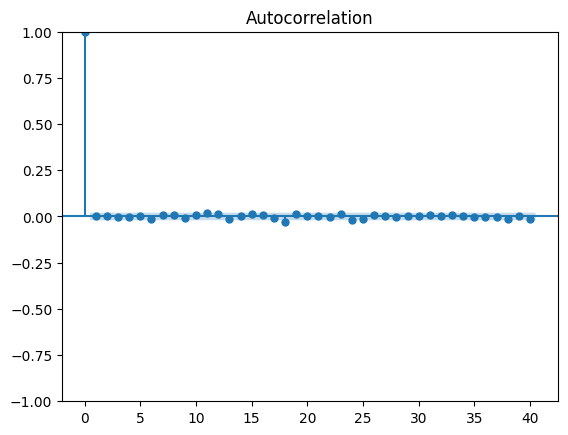

In [139]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40, alpha=0.05)  # Plot auto-correlation


## Assumption 2- Normality of Residuals 2) The second assumption is the Normality of Residuals / Error terms.

For this we prefer the Jarque Bera test. For a good model, the residuals should be normally distributed. The higher the value of Jarque Bera test , the lesser the residuals are normally distributed. We generally prefer a lower value of jarque bera test.

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. A large value for the jarque-bera test indicates non normality.

The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution. Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.

In [140]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

SignificanceResult(statistic=62349.2104370043, pvalue=0.0)


The critical chi square value at the 5% level of significance is 5.99. If the computed value exceeds this value the null hypothesis is rejected. In this case the computed value of the JB statistic 65051.11 is greater than 5.99. Thus we reject the null hypothesis that the error terms are normally distributed.

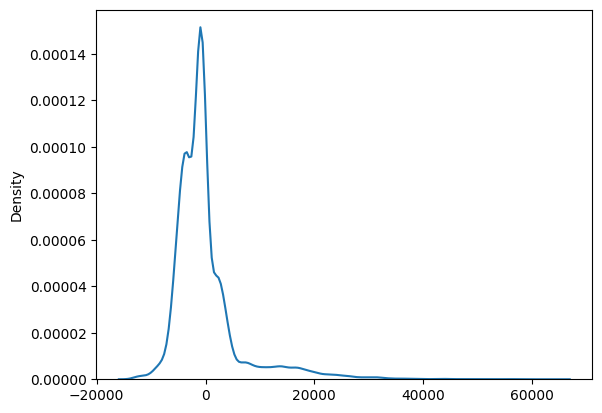

In [141]:
import seaborn as sns

sns.kdeplot(lin_reg.resid)
plt.show()

From the graph we infer that due to the high value of Jarque Bera test, only few residuals are normally distributed

## Asssumption 3 - Linearity of residuals

Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals. OR We can go for rainbow test. Let's look both of them one by one.

In [142]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)#the fraction of the data to include in the center model

(1.0142834924847086, 0.31594928343896)

H0:The data is linear, pvalue > 0.05 failed to reject H0, here we failed to reject H0 so residuals are normally distributed

In [143]:
lin_reg.resid.mean()

17.607386700945668

## Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test) Homoscedacity :: 

If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

Heteroscedacity :: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

This test is based on the hytpothesis testing where null and alternate hypothesis are: 𝐻0:𝜎𝑢𝑖 𝑖𝑠 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎 𝐻𝑎:𝜎𝑢𝑖 𝑖𝑠 𝑛𝑜𝑡 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎 The residuals should be homoscedastic.

Goldfeld Test

In [144]:
import statsmodels.stats.api as sms

In [145]:
name=['F-statistic','p-value']
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

test

(1.229945842233272, 1.4442664110282745e-12, 'increasing')

p-value below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.

## Assumption 5- NO MULTI COLLINEARITY

The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate VIF for each column in X_constant
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]

# Remove the constant term from vif as it corresponds to the intercept column
vif_values = vif[1:]

# Ensure that the length of vif_values matches the number of columns in X
assert len(vif_values) == len(X.columns), "Number of VIF values does not match number of columns in X"

# Create DataFrame with vif values and index as column names of X
vif_df = pd.DataFrame({'vif': vif_values}, index=X.columns)

# Print or use vif_df as needed
print(vif_df)


                                    vif
Income                         1.248098
Monthly Premium Auto           1.815754
Months Since Last Claim        1.002654
Months Since Policy Inception  1.002475
Total Claim Amount             2.076549


In [151]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=dfn['CLV']          
y =np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [152]:
numerical_cols.rename(columns={'CLV':'CLV'},inplace=True)

In [153]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 42)
(6393,)
(2741, 42)
(2741,)


## Model building

## Linear Regression

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.26073373730563176
R^2 score for test: 0.2548416026499797


In [156]:
y_pred = model.predict(X_test)

In [157]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [158]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.5772314153487259
MAE 0.4455033282270872
R-squared: 0.2548416026499797


In [160]:
print(X.isna().sum())


Income                            0
Monthly Premium Auto              0
Months Since Last Claim           0
Months Since Policy Inception     0
Total Claim Amount                0
Number of Open Complaints         0
Number of Policies                0
State_California                  0
State_Nevada                      0
State_Oregon                      0
State_Washington                  0
Response_Yes                      0
Coverage_Extended                 0
Coverage_Premium                  0
Education_College                 0
Education_Doctor                  0
Education_High School or Below    0
Education_Master                  0
EmploymentStatus_Employed         0
EmploymentStatus_Medical Leave    0
EmploymentStatus_Retired          0
EmploymentStatus_Unemployed       0
Gender_M                          0
Location Code_Suburban            0
Location Code_Urban               0
Marital Status_Married            0
Marital Status_Single             0
Policy_Corporate L2         

In [161]:
# Drop rows with missing values
X_cleaned = X.dropna()

# Or impute missing values
# X_imputed = X.fillna(X.mean())


In [162]:
# Check data types of columns
print(X.dtypes)

# Convert non-numeric columns to numeric
# X_numeric = X.apply(pd.to_numeric, errors='coerce')


Income                              int64
Monthly Premium Auto                int64
Months Since Last Claim             int64
Months Since Policy Inception       int64
Total Claim Amount                float64
Number of Open Complaints           int64
Number of Policies                  int64
State_California                     bool
State_Nevada                         bool
State_Oregon                         bool
State_Washington                     bool
Response_Yes                         bool
Coverage_Extended                    bool
Coverage_Premium                     bool
Education_College                    bool
Education_Doctor                     bool
Education_High School or Below       bool
Education_Master                     bool
EmploymentStatus_Employed            bool
EmploymentStatus_Medical Leave       bool
EmploymentStatus_Retired             bool
EmploymentStatus_Unemployed          bool
Gender_M                             bool
Location Code_Suburban            

In [163]:
print(np.any(np.isinf(X)))


False


In [164]:
X_cleaned = X_cleaned.astype(float)  # Convert all columns to float type


In [165]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif = [variance_inflation_factor(X_cleaned.values, i) for i in range(X_cleaned.shape[1])]

# Create DataFrame to display VIF values
vif_df = pd.DataFrame({'Feature': X_cleaned.columns, 'VIF': vif})
print(vif_df)


                           Feature        VIF
0                           Income   7.974566
1             Monthly Premium Auto  88.706508
2          Months Since Last Claim   3.235929
3    Months Since Policy Inception   3.974195
4               Total Claim Amount  13.673801
5        Number of Open Complaints   1.187788
6               Number of Policies   2.567683
7                 State_California   2.808278
8                     State_Nevada   1.508950
9                     State_Oregon   2.493827
10                State_Washington   1.463469
11                    Response_Yes   1.423093
12               Coverage_Extended   2.840549
13                Coverage_Premium   3.229731
14               Education_College   1.976361
15                Education_Doctor   1.139735
16  Education_High School or Below   1.982227
17                Education_Master   1.291027
18       EmploymentStatus_Employed  16.699120
19  EmploymentStatus_Medical Leave   1.949794
20        EmploymentStatus_Retired

In [166]:
X_new = X[['Monthly Premium Auto', 'Number of Open Complaints', 'Number of Policies', 'Coverage_Extended', 'Coverage_Premium', 'Education_High School or Below', 'EmploymentStatus_Employed', 'Marital Status_Single', 'Policy_Corporate L2', 'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4', 'Vehicle Class_SUV', 'Vehicle Class_Sports Car']]

In [170]:
import statsmodels.api as sm

# Check the shapes of X_new and y
print("Shape of X_new:", X_new.shape)
print("Shape of y:", y.shape)

# Check if there are any missing values in X_new and y
print("Missing values in X_new:", X_new.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())

# Convert X_new and y to numeric if necessary
X_new = X_new.astype(float)
y = y.astype(float)

# Add constant to X_new
X_constant_new = sm.add_constant(X_new)

# Fit OLS model
lin_reg = sm.OLS(y, X_constant_new).fit()

# Print summary
print(lin_reg.summary())


Shape of X_new: (9134, 14)
Shape of y: (9134,)
Missing values in X_new: 0
Missing values in y: 0
                            OLS Regression Results                            
Dep. Variable:                    CLV   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     130.7
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:51:13   Log-Likelihood:                -92825.
No. Observations:                9134   AIC:                         1.857e+05
Df Residuals:                    9119   BIC:                         1.858e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------

## Rigde and Lasso Regression

In [171]:
from sklearn.linear_model import Ridge, Lasso

In [173]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

ridge = Ridge(alpha=0.1)  # Remove normalize=True
ridge.fit(X_train, y_train)
print('Ridge Regression')
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))


Ridge Regression
RMSE: 0.5772298681232934
R-squared: 0.2548455973268037


In [180]:

# Initialize and fit the Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = ridge.predict(X_test_scaled)

# Calculate metrics
print('Ridge Regression')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))


Ridge Regression
RMSE: 0.5772245950843478
R-squared: 0.254859211349417


In [181]:
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('Ridge Regression')
y_pred = lasso.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression
RMSE: 0.5992937645386806
R-squared: 0.19679167777854611


## Decision Tree

In [182]:
from sklearn.tree import DecisionTreeRegressor

In [183]:
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.2636910150910177
MAE 0.10343505564943467
R-squared: 0.8444967945595979


In [185]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=np.log(dfn['CLV'])         
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

## Random Forest

In [187]:
from sklearn.ensemble import RandomForestRegressor

In [188]:
rf = RandomForestRegressor(random_state=1)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.1961521558772452
MAE 0.08885672071039409
R-squared: 0.9139531744119158


## Hyperparameter tuning of random forest

In [191]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
params = {
    'max_depth': [10, 20, 30],
    'n_estimators': [100, 200, 50],
    'bootstrap': [True, False],
    'max_features': [1.0, 'sqrt', 'log2']  # Explicitly set max_features
}


grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_

{'bootstrap': True, 'max_depth': 30, 'max_features': 1.0, 'n_estimators': 200}

In [192]:
# Remove 'max_features' from the grid.best_params_ dictionary if it's present
grid.best_params_.pop('max_features', None)

# Explicitly set max_features to 1.0 in the RandomForestRegressor
rf = RandomForestRegressor(max_features=1.0, **grid.best_params_)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE", mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


RMSE: 0.19573852906249886
MAE 0.08897568637343686
R-squared: 0.9143156863455583


In [198]:
from sklearn.ensemble import AdaBoostRegressor


In [197]:

adaboost = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5,criterion= 'squared_err'),
    n_estimators=150
)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=5),
                  n_estimators=150)

In [199]:
y_pred = adaboost.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.21843921296747437
MAE 0.13063164858229037
R-squared: 0.8932888284743855


In [200]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False)[:10]

,Score
Number of Policies,0.673132
Monthly Premium Auto,0.231002
Total Claim Amount,0.014021
Months Since Policy Inception,0.012963
Income,0.012654
Months Since Last Claim,0.012233
Number of Open Complaints,0.003214
Coverage_Extended,0.003168
EmploymentStatus_Employed,0.002763
Gender_M,0.001934


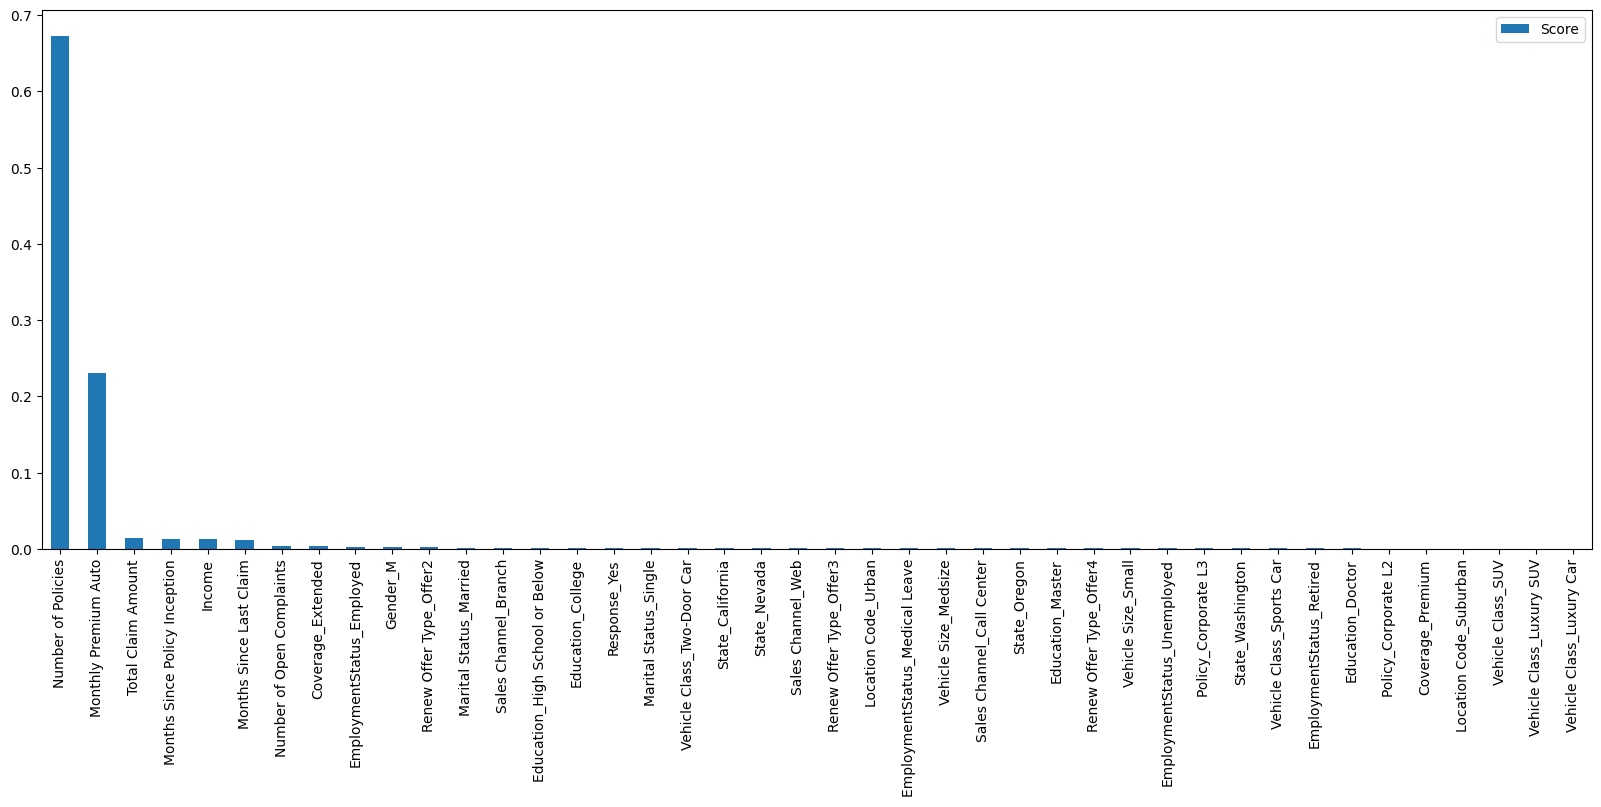

In [201]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()

The Random Forest Model, after fine-tuning its hyperparameters using GridSearchCV, exhibited the best performance in terms of Root Mean Squared Error (RMSE) and R-squared (R^2) scores compared to other models.

No of Policies and Monthly Premium emerged as the most crucial features for predicting Customer Lifetime Value (CLV). This implies that the number of policies held by a customer and the monthly premium amount significantly influence their CLV.